Best parameters found:  {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 200, 'num_leaves': 100, 'verbosity': -1}
Accuracy: 0.96070
228.93329286575317


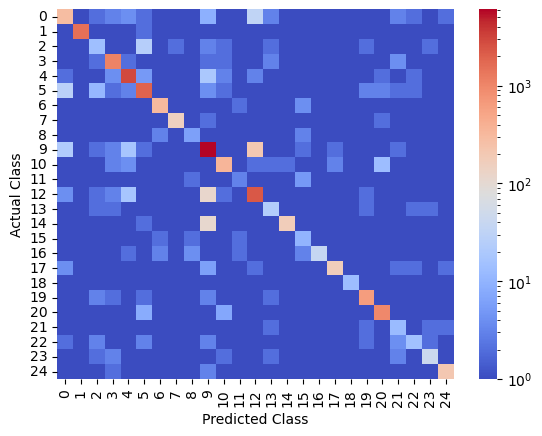

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  3 10:09:20 2024

@author: camer
"""

# TO DO: 
# - Implement CV later since it will probably add a lot to the already long runtime

# Note:
# Care in running the grid search it will take a very long time
# Current best params for sample: {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 100, 'num_leaves': 50}

import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
from time import time
start_time = time()
warnings.filterwarnings("ignore")

columns = [
    "name", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", 
    "IoTIP", "IoTIP_int", "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", 
    "PacketCount", "BytesCount", "reversePacketCount", "reverseBytesCount", "SmallPktCount", 
    "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT", "FirstNonEmptyPktSize", 
    "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount", 
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT", 
    "reverseFirstNonEmptyPktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT", 
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", 
    "NTP", "TCP_others", "UDP_others", "year_month"
]

df2 = pd.read_csv("sample2.csv", names=columns)
df = df2.drop(columns = ['name','IoTIP_int', 'hostIP_int', 'year_month'])
# Dropped dataset, IoTIP_int, hostIP_int, year_month

# Drop original date and time columns
df.drop(columns=['start_date', 'start_time', 'IoTIP', 'hostMac', 'hostIP'], inplace=True)

# Defines categorical variables
categories = ['IoTMac', 'ipProto', 'reverseFlowExists', 'remote', 'broadcast', 'HTTP', 'HTTPS', 'DNS', 'NTP', 'TCP_others', 'UDP_others']
for var in categories:
    df[var] = df[var].astype('category')

X = df.drop(columns=['IoTMac'])
y = df['IoTMac']

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

parameters = param_grid = {
    'num_leaves': [100],
    'max_depth': [20], # -1 means unlimited
    'learning_rate': [0.01],
    'n_estimators': [200],
    'verbosity': [-1]
}

grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1)
grid.fit(XTrain, yTrain)
bestParamsModel = grid.best_estimator_

bestParamsModel.fit(XTrain, yTrain)
yPred = bestParamsModel.predict(XTest)
accuracy = accuracy_score(yTest, yPred)

print("Best parameters found: ", grid.best_params_)
print(f'Accuracy: {accuracy:.5f}')
cmatrix = confusion_matrix(yTest, yPred)
for f in cmatrix:
    f += 1
import seaborn as sns
from matplotlib.colors import LogNorm
s = sns.heatmap(cmatrix, annot=False, cmap='coolwarm', norm=LogNorm())
s.set_xlabel('Predicted Class')
s.set_ylabel('Actual Class')
print(time() - start_time)
    